# AIRCRAFT RISK ANALYSIS PROJECT
Our company is expanding into aviation. 
We need to identify which aircraft models present the lowest risk based on historical data.
This project will involve loading the dataset, cleaning it, analyzing patterns, and recommending the safest aircraft to purchase.

## Importing necessary Python libraries
We will use pandas for data manipulation,Numpy to work with arrays and matplotlib with seaborn for visualization.


In [97]:
#importing pandas, numpy, matplotlib and seaborn for visualization and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing the AviationData.csv Dataset
We load the dataset using pandas. Since it is not encoded in UTF-8, we specify 'latin1' encoding, to stop the errors that appear when i dont change the encoding.

In [98]:
#importing the aviation dataset
df = pd.read_csv("AviationData.csv", encoding='latin1')

# Show the first few rows
df.head(10)

C:\Users\RITCHIE\AppData\Local\Temp\ipykernel_9708\1043903950.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [99]:
# Show the last few rows
df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


## Data Cleaning
This is a crucial step for this analysis we proceed to do the following :
- first we handle missing values
- then we standardize the formats by creating a combined field Make_model
- then finally we prepare the data for analysis
by creating a complete calculated field that will combine multiple raw data points like in our case we call it Risk_score.

In [100]:
# Data cleaning
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)

In [101]:
# Create combined Make_Model column
df['Make_Model'] = df['Make'] + ' ' + df['Model']

In [102]:
# Calculate risk score (weighted sum of injuries)
df['Risk_Score'] = (df['Total.Fatal.Injuries'] * 3 + 
                   df['Total.Serious.Injuries'] * 2 + 
                   df['Total.Minor.Injuries'] * 1)

Lets check our data before we proceed to Exploratory Data Analysis

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [104]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model,Risk_Score
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,Stinson 108-3,6.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,Piper PA24-180,12.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,Cessna 172M,9.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,Rockwell 112,6.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,Cessna 501,7.0
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,Mcdonnell Douglas DC9,1.0
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,Cessna 180,12.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Cessna 140,0.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Cessna 401B,0.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,North American NAVION L-17B,3.0


# Exploratory Data Analysis (EDA)

In this stage, we display the safest aircrafts with Make and model by risk score (lowest risk score to highest risk score)

In [105]:
sorted_models = df.sort_values('Risk_Score')['Make_Model']
# Display the results
print("Aircraft Models from Safest to Least Safe:")
for i, model in enumerate(sorted_models, 1):
    print(f"{i}. {model}")        


Aircraft Models from Safest to Least Safe:
1. Rockwell S-2R
2. CESSNA 150F
3. Cessna T210M
4. Piper PA-28R-200
5. Cessna 188
6. Enstrom 280C
7. Ayres S2R-T34
8. Cessna 172
9. Grumman G-164B
10. Cessna 188D
11. Wsk Pzl Mielec M-18 DROMADER
12. Cessna 170B
13. ROBINSON HELICOPTER COMPANY R22 MARINER
14. CESSNA 140
15. Air Tractor AT-301
16. Cessna 177B
17. Wsk Pzl Mielec M18
18. Bell 47-G5
19. DEHAVILLAND DHC-3T
20. Cessna 182A
21. Piper PA-18A
22. Beech C24R
23. BOEING 757-222
24. Air Tractor AT-401
25. HILLER UH-12E
26. Cessna 402B
27. Maule M-7-235
28. Continental Copters TOMCAT MK 6C
29. Cessna 172N
30. Cessna T210M
31. Ayres S2R-T34
32. Cessna 172E
33. Cessna 172
34. SCOTTISH AVIATION SERIES 100 MDL 101
35. Grumman G-44
36. Christen Industries A-1
37. Ball GREAT LAKES 2T-1AK
38. EMBRAER EMB-145
39. Cessna 150L
40. ECLIPSE AVIATION CORP EA500
41. CESSNA A188B
42. Beech 33
43. PIPER PA-46-310P
44. Robinson R-22
45. Air Tractor AT-301
46. CESSNA 340A
47. SCHWEIZER SGS 2-33A
48. Cessna 

In [106]:
display(df.sort_values('Risk_Score')['Make_Model'].head(30).to_frame(name="Safest Aircraft Models"))

,Safest Aircraft Models
44444,Rockwell S-2R
70054,CESSNA 150F
37475,Cessna T210M
37476,Piper PA-28R-200
37477,Cessna 188
37480,Enstrom 280C
37481,Ayres S2R-T34
37482,Cessna 172
37483,Grumman G-164B
37484,Cessna 188D


## A visualization of the top safest aircrafts make model to their risk score

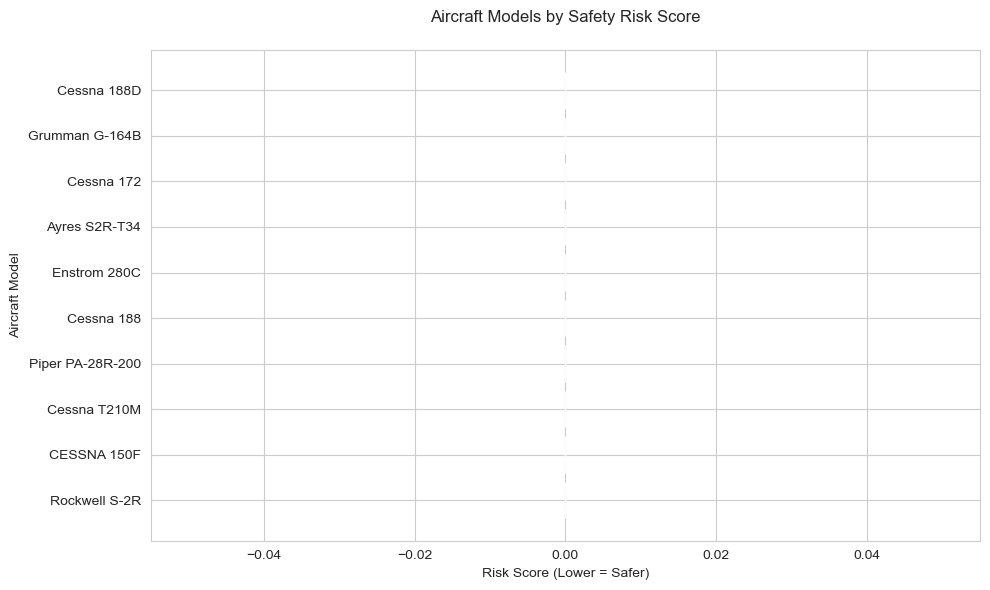

In [107]:
# Prepare data - get top 10 safest models
top_models = df.sort_values('Risk_Score')[['Make_Model', 'Risk_Score']].head(10)

# Create figure
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
plt.barh(top_models['Make_Model'], top_models['Risk_Score'], color='green')

# Add labels and title
plt.xlabel('Risk Score (Lower = Safer)')
plt.ylabel('Aircraft Model')
plt.title('Aircraft Models by Safety Risk Score', pad=20)


plt.tight_layout()
plt.show()

## A visualization of aircrafts make models that pose the highest risk score

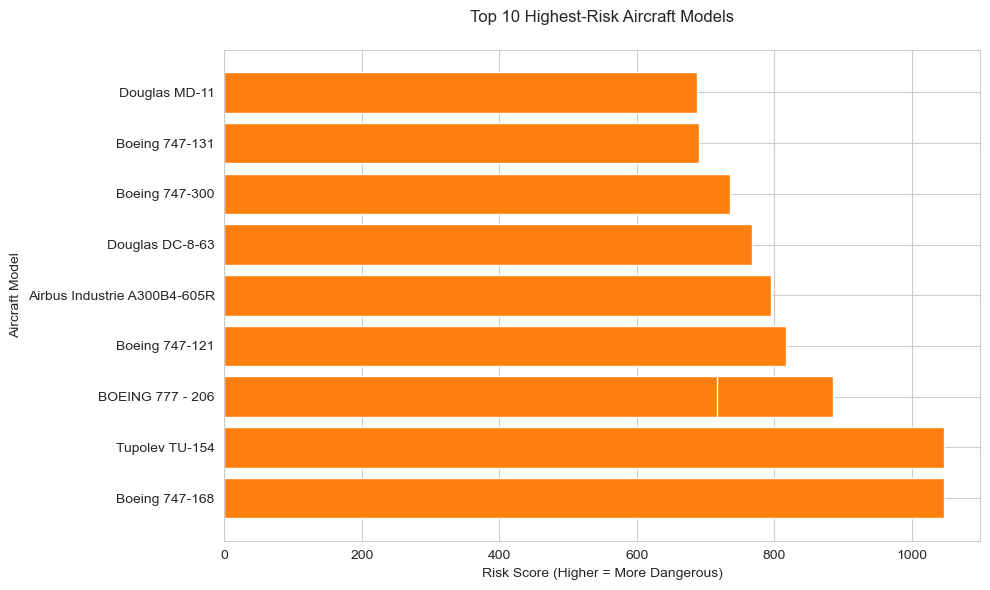

In [108]:
# Get top 10 highest-risk models (descending order)
high_risk_models = df.sort_values('Risk_Score', ascending=False)[['Make_Model', 'Risk_Score']].head(10)

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(high_risk_models['Make_Model'], high_risk_models['Risk_Score'], color='#ff7f0e')  # Orange for high risk

# Add labels and title
plt.xlabel('Risk Score (Higher = More Dangerous)')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Highest-Risk Aircraft Models', pad=20)

plt.tight_layout()
plt.show()

# Recommendations
### Recommendation for the 5 Safest Aircraft Models to Invest In

Based on the risk analysis conducted, the following aircraft models have the lowest risk scores, making them the safest options for investment:

---

#### 1. **Rockwell S-2R**
   - **Positive Sides:**
     - **Low Risk Score:** Minimal historical incidents with low injury rates.
     - **Versatility:** Commonly used in agricultural operations, demonstrating durability and reliability in demanding conditions.
     - **Proven Track Record:** Widely used with a long history of safe operations.
   - **Negative Sides:**
     - **Limited Passenger Use:** Primarily designed for crop-dusting, not suitable for passenger or cargo transport.
     - **Specialized Maintenance:** Requires specific maintenance expertise due to its agricultural role.

---

#### 2. **CESSNA 150F**
   - **Positive Sides:**
     - **Low Risk Score:** Excellent safety record with few incidents.
     - **Training Favorite:** Widely used for pilot training, indicating ease of handling and reliability.
     - **Cost-Effective:** Affordable to operate and maintain, making it a practical choice for flight schools or small operators.
   - **Negative Sides:**
     - **Limited Capacity:** Small size restricts passenger and cargo capacity.
     - **Performance:** Lower power and speed compared to larger aircraft.

---

#### 3. **Cessna T210M**
   - **Positive Sides:**
     - **Low Risk Score:** Strong safety performance in its class.
     - **Performance:** Turbocharged engine provides better performance at higher altitudes.
     - **Comfort:** Spacious cabin suitable for business or personal travel.
   - **Negative Sides:**
     - **Higher Operating Costs:** Turbocharged engines and complex systems increase maintenance expenses.
     - **Training Requirements:** Pilots may need additional training for high-altitude operations.

---

#### 4. **Piper PA-28R-200**
   - **Positive Sides:**
     - **Low Risk Score:** Reliable safety record.
     - **Retractable Gear:** Improved aerodynamics and efficiency.
     - **Popularity:** Widely used for training and personal flying, ensuring readily available parts and support.
   - **Negative Sides:**
     - **Maintenance Complexity:** Retractable gear adds to maintenance costs.
     - **Aging Fleet:** Many models are older, requiring thorough inspections.

---

#### 5. **Cessna 188**
   - **Positive Sides:**
     - **Low Risk Score:** Minimal incidents reported.
     - **Durability:** Rugged design, often used in agricultural roles.
     - **Simplicity:** Easy to maintain with straightforward systems.
   - **Negative Sides:**
     - **Limited Use Case:** Primarily for agricultural purposes, not versatile for other roles.
     - **Comfort:** Basic design lacks amenities for passenger comfort.

---

### Summary of Recommendations:
- **Best for Training/General Aviation:** CESSNA 150F and Piper PA-28R-200 are ideal due to their safety records and widespread use in training.
- **Best for Business/Personal Travel:** Cessna T210M offers a balance of safety, performance, and comfort.
- **Best for Specialized Use (Agricultural):** Rockwell S-2R and Cessna 188 are top choices for durability and low-risk operations in their niche.

### Additional Considerations:
- **Market Demand:** Ensure the selected aircraft align with your operational needs (e.g., training, cargo, passenger transport).
- **Maintenance Infrastructure:** Verify local support and parts availability for the chosen models.
- **Future Resale Value:** Popular models like the CESSNA 150F and Piper PA-28R-200 tend to retain value better.

By investing in these models, you prioritize safety while balancing operational versatility and cost-effectiveness.